# MORINGA SCHOOL  -  PHASE III PROJECT

## Investigating Customer Churn in SyriaTel, A Telecommunication Company




## A Project by:
<br>

## KEVIN M. RIUNGU
<br>
<br>

## PROBLEM STATEMENT

Customer churn, also known as customer attrition or customer turnover, refers to the rate at which customers stop doing business with a company over a given period of time. It is a crucial metric for businesses, especially those in subscription-based industries or services, as it directly impacts the company's revenue and growth.
<br>
This project sets out to Investigate and analyze factors influencing customer churn in Syriatel using a comprehensive dataset from Kaggle. The project aims to identify patterns and key drivers of customer attrition, providing actionable insights and strategic recommendations to aid Syriatel's decision-makers in implementing effective customer retention strategies.
<br>
<br>

In [252]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, Labelencoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

In [253]:
#Loading the dataset
df = pd.read_csv('SyriaTel_Customer_Churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [254]:
#Dimensions of the dataset
df.shape

(3333, 21)

In [255]:
#Describing the dataset
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [256]:
# Inspecting presence of Null values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [257]:
# Checking the datatypes of the features
print(df.dtypes)

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [258]:
# "Area code" seems like a categorical variable encoded as numeric

df['area code'].value_counts()

area code
415    1655
510     840
408     838
Name: count, dtype: int64

In [259]:
# Convert 'area code' to categorical
df['area code'] = df['area code'].astype('category')


In [260]:
# Checking distribution of our target column
churn_counts = df['churn'].value_counts()
churn_counts

churn
False    2850
True      483
Name: count, dtype: int64

In [261]:
df['churn'].value_counts(normalize = True)

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64

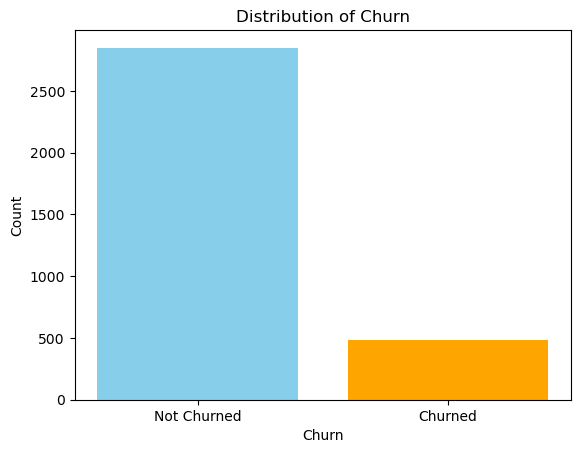

In [262]:
#Distribution of our target variable

plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'orange'])
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(churn_counts.index, labels=['Not Churned', 'Churned'])
plt.show()


The dataset is unbalanced on the ration of 'churn' and 'Not churned' implying that metrics like accuracy score would be deceptive. Therefore metrics like recall and precision and model log loss would be more appropriate.

## Data Preparation

In [263]:
# Separate the target variable and predictor features
y = df['churn']
X = df.drop('churn', axis = 1)

In [264]:
# splitting training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 11)
print(len(X_train), len(X_test), len(y_train), len(y_test))

2499 834 2499 834


In [265]:
#One Hot Encoding Categorical Variables
X_train_categorical = X_train[['state', 'area code', 'international plan', 'voice mail plan']]

In [266]:
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False)
ohe.fit(X_train_categorical)
X_train_ohe = pd.DataFrame(ohe.transform(X_train_categorical), index = X_train_categorical.index, 
                           columns = np.hstack(ohe.categories_))

In [267]:
# Normalizing/ scaling numeric features
X_train_numeric = X_train[['account length', 'number vmail messages', 'total day minutes', 
                            'total day calls', 'total day charge']]
scaler = MinMaxScaler()
scaler.fit(X_train_numeric)
X_train_scaled = pd.DataFrame(scaler.transform(X_train_numeric), index = X_train_numeric.index, 
                              columns = X_train_numeric.columns)

In [268]:
# concatenating everything back together
X_train_processed = pd.concat([X_train_scaled, X_train_ohe], axis = 1)
X_train_processed.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,AK,AL,AR,AZ,CA,...,WI,WV,WY,408,415,510,no,yes,no,yes
2329,0.561983,0.000000,0.298461,0.696970,0.298457,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1347,0.454545,0.000000,0.641106,0.709091,0.641013,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2994,0.524793,0.000000,0.649658,0.787879,0.649564,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1412,0.537190,0.470588,0.387400,0.363636,0.387324,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
96,0.297521,0.000000,0.456385,0.666667,0.456405,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [269]:
#One Hot Encoding Categorical Variables
X_test_categorical = X_test[['state', 'area code', 'international plan', 'voice mail plan']]

In [270]:

ohe.transform(X_train_categorical)
X_test_ohe = pd.DataFrame(ohe.transform(X_test_categorical), index = X_test_categorical.index, 
                           columns = np.hstack(ohe.categories_))

In [271]:
# Normalizing/ scaling numeric features
X_test_numeric = X_test[['account length', 'number vmail messages', 'total day minutes', 
                            'total day calls', 'total day charge']]
scaler.transform(X_test_numeric)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_numeric), index = X_test_numeric.index, 
                              columns = X_test_numeric.columns)

In [272]:
# concatenating everything back together
X_test_processed = pd.concat([X_test_scaled, X_test_ohe], axis = 1)
X_test_processed.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,AK,AL,AR,AZ,CA,...,WI,WV,WY,408,415,510,no,yes,no,yes
1615,0.301653,0.00000,0.447834,0.575758,0.447854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2254,0.396694,0.54902,0.576682,0.587879,0.576626,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2346,0.466942,0.00000,0.482326,0.581818,0.482227,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2073,0.574380,0.00000,0.457526,0.690909,0.457579,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2336,0.500000,0.72549,0.464652,0.648485,0.464621,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


## MODEL FITTING

In [273]:
#Fitting a Vanilla baseline Logistic Regression model
# Convert feature names to strings
X_train_processed.columns = X_train_full.columns.astype(str)
X_test_processed.columns = X_test_full.columns.astype(str)
# Now, you can fit the Logistic Regression model again
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train_processed, y_train)
print(model_log)


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')


### Evaluating Baseline Model

#### Performance on Training and Testing Data

In [274]:

y_hat_train = logreg.predict(X_train_processed)
print("Training Accuracy: ", accuracy_score(y_train, y_hat_train))

Training Accuracy:  0.8591436574629852


In [275]:
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

       False       0.87      0.98      0.92      2136
        True       0.55      0.16      0.25       363

    accuracy                           0.86      2499
   macro avg       0.71      0.57      0.59      2499
weighted avg       0.83      0.86      0.82      2499



In [276]:
print(confusion_matrix(y_train, y_hat_train))

[[2089   47]
 [ 305   58]]


In [277]:
# Calculating the  precision, recall, and F1 score
precision = precision_score(y_train, y_hat_train)
recall = recall_score(y_train, y_hat_train)
f1 = f1_score(y_train, y_hat_train)
print("Training Precision =", precision)
print("Training recall =", recall)
print("Training F1 Score =", f1)

Training Precision = 0.5523809523809524
Training recall = 0.15977961432506887
Training F1 Score = 0.24786324786324784


In [278]:
#Performance on test data
y_hat_test = logreg.predict(X_test_processed)
Test_precision = precision_score(y_test, y_hat_test)
Test_recall = recall_score(y_test, y_hat_test)
Test_f1 = f1_score(y_test, y_hat_test)
print("Testing Precision =", Test_precision)
print("Testing Recall = ", Test_recall)
print("Training F1 Score =", Test_f1)

Testing Precision = 0.4642857142857143
Testing Recall =  0.10833333333333334
Training F1 Score = 0.17567567567567569


### Fitting a Decision Tree
<br>

In [279]:
#Training a decision Tree
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state =11)
clf. fit(X_train_processed, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=11)

#### Decision Tree Performance on Training and Testing Data

In [280]:

y_preds = clf.predict(X_train_processed)

In [281]:
# Performance on training
dt_precision = precision_score(y_train, y_preds)
dt_recall = recall_score(y_train, y_preds)
dt_F1_score = f1_score(y_train, y_preds)
print("Precision on training =", dt_precision)
print("Recall on Training =", dt_recall)
print("F1 Score on Training =", dt_F1_score)

Precision on training = 0.7195767195767195
Recall on Training = 0.3746556473829201
F1 Score on Training = 0.4927536231884058


In [282]:
# Performance on testing
y_hat = clf.predict(X_test_processed)
dt_test_precision = precision_score(y_test, y_hat)
dt_test_recall = recall_score(y_test, y_hat)
dt_test_F1 = f1_score(y_test, y_hat)
print("Precision on testing =", dt_test_precision)
print("Recall on Testing =", dt_test_recall)
print("F1 Score on Testing =", dt_test_F1)

Precision on testing = 0.6842105263157895
Recall on Testing = 0.325
F1 Score on Testing = 0.4406779661016949


### Hyperparameter Tuning: <br>Tuned Decision Tree with Cross Validation and Grid Search of Parameters

In [283]:
clf_tuned = DecisionTreeClassifier()
param_grid = {'criterion':['gini', 'entropy'], 'max_depth':[1,2,3,5,10], 'min_samples_split':[2,5,10,20]}
gs_tree = GridSearchCV(clf, param_grid, cv = 5)
gs_tree.fit(X_train_processed, y_train)
gs_tree.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}

#### Tuned Model Performance on Training and Test Data

In [284]:
# Performance on Training Data
y_tuned_preds = gs_tree.predict(X_train_processed)

In [285]:
tuned_precision = precision_score(y_train, y_tuned_preds)
tuned_recall = recall_score(y_train, y_tuned_preds)
tuned_f1 = f1_score(y_train, y_tuned_preds)
print("Tuned Model Training Precision =", tuned_precision)
print("Tuned Model Training Recall =", tuned_recall)
print("Tuned Model Training f1_Score =", tuned_f1)

Tuned Model Training Precision = 0.7416666666666667
Tuned Model Training Recall = 0.24517906336088155
Tuned Model Training f1_Score = 0.36853002070393376


In [286]:
# Performance on Testing Data
y_preds_test = gs_tree.predict(X_test_processed)

In [287]:
tuned_t_precision = precision_score(y_test, y_preds_test)
tuned_t_recall = recall_score(y_test, y_preds_test)
tuned_t_f1 = f1_score(y_test, y_preds_test)
print("Tuned Model Testing Precision =", tuned_t_precision)
print("Tuned Model Testing Recall =", tuned_t_recall)
print("Tuned Model Testing f1_Score =", tuned_t_f1)

Tuned Model Testing Precision = 0.8421052631578947
Tuned Model Testing Recall = 0.26666666666666666
Tuned Model Testing f1_Score = 0.4050632911392405


### Ensemble Model <br> Random Forest 

In [288]:
forest = RandomForestClassifier(n_estimators = 100, max_depth =5)
forest.fit(X_train_processed, y_train)

RandomForestClassifier(max_depth=5)

#### Random Forest Performance on Training and Testing data

In [289]:
y_pred_f = forest.predict(X_train_processed)

In [290]:
# Performance on Training data
random_forest_precision = precision_score(y_train, y_pred_f)
random_forest_recall = recall_score(y_train, y_pred_f)
random_forest_f1   = f1_score(y_train, y_pred_f)
print("Random forest Training Precision =", random_forest_precision)
print("Random forest Training Recall =", random_forest_recall)
print("Random forest Training f1_Score =", random_forest_f1)

Random forest Training Precision = 0.8514851485148515
Random forest Training Recall = 0.2369146005509642
Random forest Training f1_Score = 0.37068965517241376


In [291]:
# Performance on Testing data
y_f_test_preds = forest.predict(X_test_processed)
rf_test_precision = precision_score(y_test, y_f_test_preds)
rf_test_recall = recall_score(y_test, y_f_test_preds)
rf_test_f1   = f1_score(y_test, y_f_test_preds)
print("Random forest Training Precision =", rf_test_precision)
print("Random forest Training Recall =", rf_test_recall)
print("Random forest Training f1_Score =", rf_test_f1)

Random forest Training Precision = 0.8333333333333334
Random forest Training Recall = 0.25
Random forest Training f1_Score = 0.3846153846153846


#### Features importance

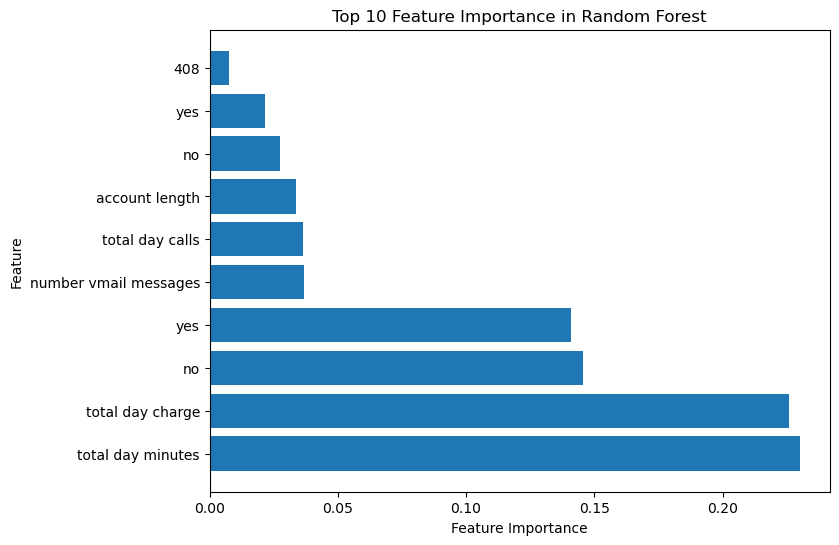

In [292]:
def plot_top_feature_importances(model, top_n=10):
    # Get feature importances and indices
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Select the top N features
    top_indices = indices[:top_n]
    top_importances = importances[top_indices]
    top_feature_names = X_train_processed.columns.values[top_indices]

    # Plot the top N feature importances
    plt.figure(figsize=(8, 6))
    plt.barh(range(top_n), top_importances, align='center')
    plt.yticks(np.arange(top_n), top_feature_names)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(f'Top {top_n} Feature Importance in Random Forest')
    plt.show()

plot_top_feature_importances(forest, top_n=10)


### GRADIENT BOOSTING <BR> <br> XGBoost

In [295]:
import warnings
# Ensure unique column names
X_train_processed.columns = range(X_train_processed.shape[1])

# Suppress XGBoost FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)


XGB_clf = XGBClassifier()
XGB_clf.fit(X_train_processed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#### Performance on Training and Test sets

In [296]:

training_preds = XGB_clf.predict(X_train_processed)

In [298]:
X_test_processed.columns = range(X_test_processed.shape[1])
test_preds = XGB_clf.predict(X_test_processed)

In [ ]:
# Performance on Training set
training_precision = precision_score(y_train, training_preds)
training_recall = recall_score(y_train, training_preds)
training_f1_score = f1_score(y_train, training_preds)
print("XGB Training Precision = ", training_precision)
print("XGB Training Recall = ", training_recall)
print("XGB Training f1_score = ", training_f1_score)

In [309]:
training_accuracy = accuracy_score(y_train, training_preds)
training_accuracy

0.9595838335334134

In [299]:
# Performance on Testing set
testing_precision = precision_score(y_test, test_preds)
testing_recall = recall_score(y_test, test_preds)
testing_f1_score = f1_score(y_test, test_preds)
print("XGB Testing Precision = ", testing_precision)
print("XGB Testing Recall = ", testing_recall)
print("XGB Testing Precision = ", testing_f1_score)


XGB Testing Precision =  0.6666666666666666
XGB Testing Recall =  0.35
XGB Testing Precision =  0.4590163934426229


Though the gradient boosted model has significantly improved performance, the discrepancy in training and testing results indicates that the model is seriously overfitting

### Hyperparameter Tuning XGBoost Model with GridSearchCV

In [315]:
# warnings.simplefilter(action='ignore', category=FutureWarning)

param_grid ={
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1,2,3],
    'n_estimators': [100],    
}
grid_clf = GridSearchCV(XGB_clf, param_grid, scoring = 'recall', cv =3, n_jobs =1)
grid_clf.fit (X_train_processed, y_train)
best_parameters = grid_clf.best_params_
best_parameters

{'learning_rate': 0.2,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 100}

In [320]:
training_preds2 = grid_clf.predict(X_train_processed)
test_preds2 = grid_clf.predict(X_test_processed)

In [317]:
training_accuracy2 = accuracy_score(y_train, training_preds2)
training_accuracy2

0.9595838335334134

In [318]:
training_precision = grid_clf.predict(X_train_processed)
training_precision

array([0, 0, 0, ..., 0, 0, 0])

### PICKLING THE FINAL MODEL